In [14]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2, u1, u2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1) + k2 * (x2 - x1)+ u1*((x1)**3)+ u2*((x1-x2)**3)) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1)+ u2*((x2-x1)**3)) / m2]
    return f

In [15]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint
import numpy as np

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 0.4
k2 = 1.808
# Natural lengths
L1 = 0.0
L2 = 0.0
# Friction coefficients
b1 = 0.0
b2 = 0.0

#Non-linear coefficients
u1=-1.0/6.0
u2=-1.0/10.0

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 1.0
y1 = 0.0
x2 = -1.0/2.0
y2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 50
numpoints = 500

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2,u1, u2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('nolineal3.1.dat', 'w') as f: # Print & save the solution. 
    for t1, w1 in zip(t, wsol): print(t1, w1[0], w1[1], w1[2], w1[3], file=f)

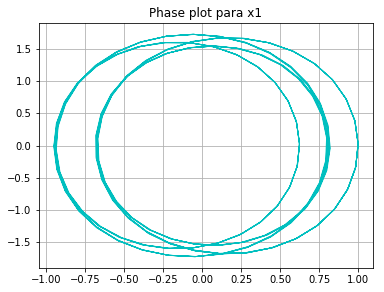

In [16]:
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
from matplotlib import pyplot as pl
%matplotlib inline

t, x1, xy, x2, y2 = loadtxt('nolineal3.1.dat', unpack=True)


figure(1, figsize=(6, 4.5))
lw=1
plot(x1,xy, 'c', linewidth=lw)
title("Phase plot para x1")
grid(True)
savefig("nolineal3.1.1.png", dpi=100)

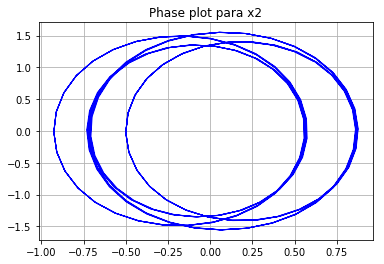

In [6]:
plot(x2,y2, 'b', linewidth=lw)
grid(True)
title("Phase plot para x2")
savefig("nolineal3.1.2.png", dpi=100)

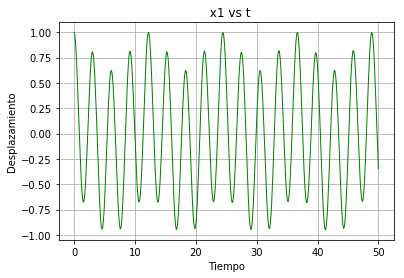

In [7]:
plot(t,x1, 'g', linewidth=lw)
grid(True)
title("  x1 vs t")
pl.xlabel("Tiempo")
pl.ylabel("Desplazamiento")
savefig("nolineal3.1.3.png")

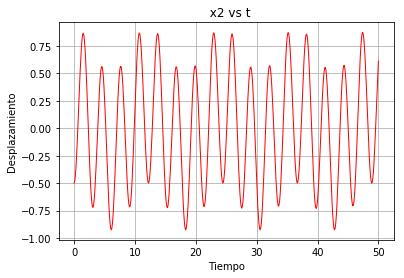

In [10]:
plot(t,x2, 'r', linewidth=lw)
grid(True)
title("  x2 vs t")
pl.xlabel("Tiempo")
pl.ylabel("Desplazamiento")
savefig("nolineal3.1.4.png")

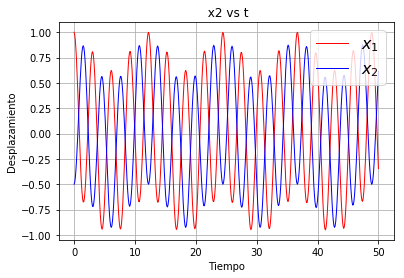

In [12]:
plot(t, x1, 'r', linewidth=lw)
plot(t,x2, 'b', linewidth=lw)
grid(True)
title("  x2 vs t ")
pl.xlabel("Tiempo")
pl.ylabel("Desplazamiento")
legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
savefig("nolineal3.1.5.png")

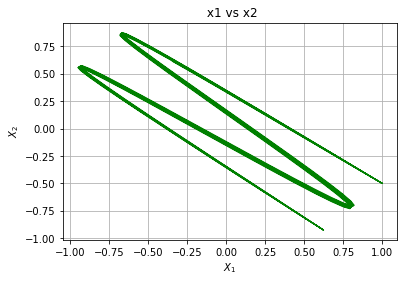

In [13]:
plot(x1,x2, 'g', linewidth=lw)
grid(True)
title(" x1 vs x2")
pl.xlabel("$X_1$")
pl.ylabel("$X_2$")
savefig("nolineal3.1.6.png")